In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from Functions.FunctionsDataVisualization import plotConfusionMatrix, savefig, snsConfusionMatrix
from lps_toolbox.metrics.classification import sp_index
from sklearn.metrics import recall_score,confusion_matrix

import pickle



Using TensorFlow backend.


In [2]:
classes={'class_S':[[9,10,13,14,16,23,1,2,22,21],
                             [4,6,8,12,17,19],
                             [11,24],
                             [5,7,15,3,18,20]],
        'class_A':[[9,10,13,14,16],
                        [23,1,2,22],
                        [21]],
        'class_B':[[4],
                        [6],
                        [8],
                        [12],
                        [17],
                        [19]],
        'class_D':[[5,7,15],
                [3,18,20]],
         
        'class_C':[[11],
                    [24]],
        'class_AA':[[9],
                         [10],
                         [13],
                         [14],
                         [16]],
        'class_AB':[[23],
                         [1],
                         [2],
                         [22]],
        'class_DA':[[5],
                         [7],
                         [15]],
        'class_DB':[[3],
                         [18],
                         [20]]}

In [11]:
class_name = list(classes.keys())
n_folds = 3
batch = 512

files = {}
files_fold = {}
eff_ech_class = {}
file_hier = '/home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_spec_S_A_AA_withFolds_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss'

In [12]:
df_pred = {}
master_fold = {}
for ifold in range(n_folds):
    files_fold[ifold] = file_hier + '/fold0{0}'.format(ifold)
    master_fold[ifold] = pd.read_csv(files_fold[ifold]+'/master_table.csv')
    files_class = []
    for iclass in class_name:
        file = file_hier + '/fold0{0}'.format(ifold) +'/'+iclass
        files_class.append(file)
    files[ifold] = files_class
    df_pred[ifold] = pd.read_csv(files_fold[ifold] + '/pred_all.csv')


In [14]:
pred_df = pd.concat(df_pred)

/home/venancio/sonarteste/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [17]:
#work with only pred_df and table_master
sp_folds = []
for ifold in range(n_folds):
    pred = pred_df.loc[ifold]['pred'].values
    master_ifold = master_fold[ifold]
    test_id = master_ifold[master_ifold['fold_0{0}'.format(ifold)]==1].index.values
    true = master_ifold['target'].values
    sp = sp_index(y_pred=pred[test_id],y_true=true[test_id])
    sp_folds.append(sp)
    print("SP of fold {0}:{1:.2f}".format(ifold,sp))

print("SP: {0:.2f} +- {1:.2f}".format(np.asarray(sp_folds).mean(),np.asarray(sp_folds).std()))

SP of fold 0:0.58
SP of fold 1:0.70
SP of fold 2:0.65
SP: 0.64 +- 0.05


figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_spec_S_A_AA_withFolds_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/SP_each_classes_en.png file


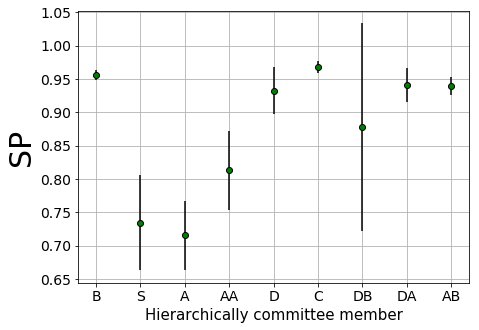

In [19]:
fig, ax = plt.subplots(figsize=(7,5))
sp_class_mean = []
sp_class_std = []
for iclass in class_name:
    sp_folds = []
    for ifold in range(n_folds):
        pred = pred_df.loc[ifold,iclass].values
        master_ifold = master_fold[ifold]
        test_id = master_ifold[(master_ifold[iclass]!=-1)&(master_ifold['fold_0{0}'.format(ifold)]==1)].index.values
        true = master_ifold[iclass].values
        sp = sp_index(y_pred=pred[test_id],y_true=true[test_id])
        sp_folds.append(sp)
    sp_class_mean.append(np.asarray(sp_folds).mean())
    sp_class_std.append(np.asarray(sp_folds).std())
    
    
    

plt.errorbar(x=map(lambda x: x.split('_')[-1],class_name),y=sp_class_mean,yerr=sp_class_std,
             marker='o',
             color='k',
             ecolor='k',
             markerfacecolor='g',
             capsize=0,
             linestyle='None',label=u"SP médio")
plt.grid()
#plt.xlabel("Classes",fontsize=30)
plt.xlabel("Hierarchically committee member",fontsize=15)

plt.ylabel("SP",fontsize=30)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.title(u"SP de cada classe em cada nível da Rede Hierárquica (10 folds)",fontsize=15)
#plt.savefig(file_hier+'SP_all_classes_pt.png')
savefig(plt,file_hier +'/SP_each_classes_en.png')